In [62]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [63]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32

# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Validation data generator with only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Training set
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='binary'
)

# Validation set (should not be augmented!)
valid_generator = test_datagen.flow_from_directory(
    'test',
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='binary'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [64]:
model = Sequential() 

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3))) 
model.add(BatchNormalization())
model.add(MaxPooling2D (pool_size=(2,2), strides=2, padding='valid')) 

model.add(Conv2D (64, kernel_size=(3,3), padding='valid', activation='relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid')) 

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid')) 

model.add(Flatten()) 
model.add(Dense (128, activation='relu')) 
model.add(Dropout(0.1))
model.add(Dense (64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense (1, activation='sigmoid'))

In [65]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [66]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [67]:
history = model.fit(train_generator, epochs=10, validation_data= valid_generator)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 820s 1s/step - accuracy: 0.5689 - loss: 2.7261 - val_accuracy: 0.6916 - val_loss: 1.0103
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 770s 1s/step - accuracy: 0.6853 - loss: 0.6080 - val_accuracy: 0.6048 - val_loss: 0.8595
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 670s 1s/step - accuracy: 0.7204 - loss: 0.5617 - val_accuracy: 0.7542 - val_loss: 0.5010
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 698s 1s/step - accuracy: 0.7697 - loss: 0.4805 - val_accuracy: 0.8032 - val_loss: 0.4229
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 649s 1s/step - accuracy: 0.8038 - loss: 0.4351 - val_accuracy: 0.7842 - val_loss: 0.4632
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 687s 1s/step - accuracy: 0.8167 - loss: 0.4022 - val_accuracy: 0.7472 - val_loss: 0.5156
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 640s 1s/step - accuracy: 0.8342 - loss: 0.3865 - val_accuracy: 0.8350 - val_loss: 0.3720
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 686s 1s/step - accuracy: 0.8552 - loss: 0.3352 - val_accu

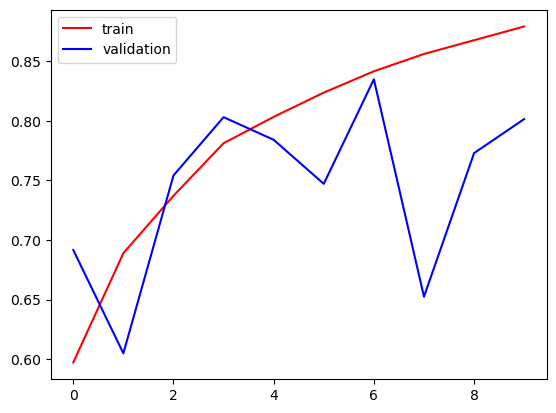

In [68]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

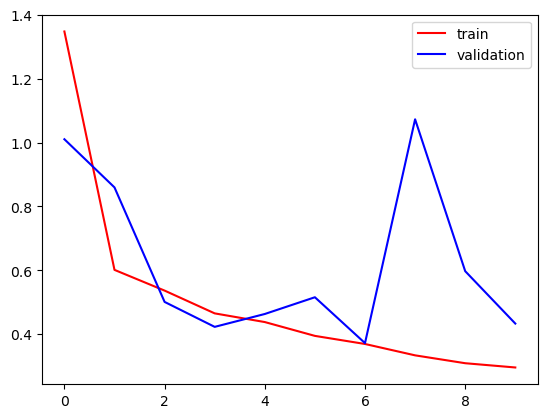

In [69]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()